In [69]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:

datas = pd.read_csv('TCPA strategy - hello_fresh-subription.csv')
datas
datas = datas.rename({'Date & time':'date'}, axis = 1)
datas['date'] = pd.to_datetime(datas['date']).dt.strftime("%y-%m-%d")
# datas = datas.drop(['Date & time'], axis=1)
datas

,date,User,Campaign,Ad group,Changes
0,22-06-29,thomas.abraham@pixis.ai,US-S[01]: Prospecting | Brand | Subscription -...,NaN,Campaign changed\n Target CPA increased from ...
1,22-06-17,thomas.abraham@pixis.ai,US-S[01]: Prospecting | Brand | Subscription -...,NaN,1 negative data segment added\n EXCLUSION_Act...
2,22-06-05,performance.prod@pixis.ai,US-S[01]: Prospecting | Brand | Subscription -...,NaN,1 budget amount decreased\n US-S[01]: Prospec...
3,22-06-05,performance.prod@pixis.ai,US-S[01]: Prospecting | Brand | Subscription -...,NaN,1 budget amount increased\n US-S[01]: Prospec...
4,22-06-04,performance.prod@pixis.ai,US-S[01]: Prospecting | Brand | Subscription -...,NaN,Campaign changed\n Target CPA increased from ...
...,...,...,...,...,...
154,22-01-07,admin@stealthventurelabs.com,US-S[01]: Prospecting | Brand | Subscription -...,NaN,32 negative exact match keyword added\n -[gre...
155,22-01-06,admin@stealthventurelabs.com,US-S[01]: Prospecting | Brand | Subscription -...,NaN,Campaign changed\n Target CPA increased from ...
156,22-01-05,admin@stealthventurelabs.com,US-S[01]: Prospecting | Brand | Subscription -...,NaN,Campaign changed\n Target CPA decreased from ...
157,22-01-04,admin@stealthventurelabs.com,US-S[01]: Prospecting | Brand | Subscription -...,NaN,1 budget amount decreased\n US-S[01]: Prospec...


In [3]:

def get_tcpa_range(data):

  initial = []
  final = []
  dates = []
  campaigns = []
  ad_group = []
  # data["Changes"]
  level = []
  # data["Date & time"]
  # print(type(data["Changes"]))
  for i in range(len(data["Changes"])):
    if "Target CPA" in data["Changes"][i]:
      # print(i)
      # print(data["Changes"][i])
      # print(data["Date & time"][i])
      dates.append(data["date"][i])
      campaigns.append(data["Campaign"][i])
      ad_group.append(data["Ad group"][i])
      

    
      if "Campaign" in data["Changes"][i]:
        level.append("campaign")

      else:
        level.append("ad group")
    
      # print((i))
      k = data["Changes"][i].split(" ")
      # print(i)
    
      for j in k:
        if "to" == j:
          initial.append((k[k.index(j)-1].replace("$","")))
          final.append((k[k.index(j)+1].replace("$","")))
        
    
  df= pd.DataFrame()
  df["date"]= dates
  df["initial"] = initial
  df["final"] = final
  df["level"] = level
  df["Campaign name"]= campaigns
  df["Ad group name"] = ad_group
  
  return df 

In [6]:
tcpa = get_tcpa_range(datas)
df= tcpa 
# df
tcpa['final'] = tcpa['final'].astype(float)
# ta["lvel"]=="agroup"
# tcpa["Campaign name"]==

In [7]:
data = pd.read_csv('TCPA strategy - Hellofresh-metric.csv')
data[data["Campaign name"]== "US-S[01]: Prospecting | Brand | Subscription - Broad"]["Bidding strategy type"].unique()

array(['Target CPA'], dtype=object)

In [8]:
data = pd.read_csv('TCPA strategy - Hellofresh-metric.csv')
data.rename(columns={'Date':'date','Ad group ID':'ad_group_id','Campaign ID':'campaign_id','Cost':'cost','Keyword ID':'keyword_id','Cost per conversion':'cost_per_conversion','Conversions':'conversions','Clicks':'clicks','Impressions':'impressions','Impression share':'impression_share','Keyword':'keyword'},inplace=True)


data_meals = data[data["Campaign name"]== "US-S[01]: Prospecting | Brand | Subscription - Broad"].copy()
data_meals['date'] = pd.to_datetime(data_meals['date']).dt.strftime("%y-%m-%d")
data_meals


,date,campaign_id,ad_group_id,keyword_id,keyword,Match type,Bidding strategy type,Ad group name,Campaign name,impressions,...,conversions,Conversion rate,Value per conversion,Return on ad spend (ROAS),impression_share,Search rank lost impression share,Lost impressions,Absolute top impression percentage,Lost impressions due to rank,Estimated total conversion rate
221,22-01-01,13273184594,122879339237,46839732707,www hellofresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1325,...,24.05,7.29,34.46,0.34,0.62,0.38,757,0.80,757,0.77
222,22-01-01,13273184594,122879339237,49526709012,hellofresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1977,...,48.86,8.05,44.83,0.63,0.67,0.33,921,0.81,921,1.01
223,22-01-01,13273184594,122879339237,50657052167,hello fresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,4297,...,61.77,6.97,35.07,0.39,0.51,0.49,3823,0.69,3823,0.69
224,22-01-01,13273184594,122879339237,294870259587,hello fresh box,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,122,...,0.00,0.00,NaN,0.00,0.25,0.75,327,0.45,327,0.41
225,22-01-01,13273184594,122879339237,296080198929,www hello fresh,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,2430,...,50.70,8.77,40.54,0.45,0.76,0.24,756,0.81,756,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55345,22-07-06,13273184594,122879339237,302429439038,hellofreshcom,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,66,...,0.00,0.00,NaN,0.00,NaN,NaN,0,0.15,0,1.00
55346,22-07-06,13273184594,122879339237,324312504855,hello fresh service,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,5,...,0.00,0.00,NaN,0.00,NaN,NaN,0,0.40,0,1.00
55347,22-07-06,13273184594,122879339237,360638208892,hello fresh options,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,12,...,0.00,0.00,NaN,0.00,NaN,NaN,0,0.64,0,0.00
55348,22-07-06,13273184594,122879339237,381486190255,hello fresh plan,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1,...,0.00,NaN,NaN,NaN,NaN,NaN,0,0.00,0,NaN


In [9]:

# tcpa
tcpa = tcpa[tcpa["level"]== "campaign"]
tcpa


,date,initial,final,level,Campaign name,Ad group name
0,22-06-29,105.00,135.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
1,22-06-04,95.00,105.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
7,22-05-23,105.00,95.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
12,22-05-17,95.00,105.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
13,22-05-17,90.00,95.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
14,22-04-23,85.00,90.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
17,22-04-13,75.00,85.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
19,22-04-12,85.00,75.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
20,22-04-11,95.00,85.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN
21,22-04-09,75.00,95.0,campaign,US-S[01]: Prospecting | Brand | Subscription -...,NaN


In [10]:

data1 = pd.merge(data_meals,tcpa,on=['date'], how = "left")
data1["final"].fillna(method ="ffill", inplace = True)
# df.fillna(method='ffill')

data1

,date,campaign_id,ad_group_id,keyword_id,keyword,Match type,Bidding strategy type,Ad group name_x,Campaign name_x,impressions,...,Search rank lost impression share,Lost impressions,Absolute top impression percentage,Lost impressions due to rank,Estimated total conversion rate,initial,final,level,Campaign name_y,Ad group name_y
0,22-01-01,13273184594,122879339237,46839732707,www hellofresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1325,...,0.38,757,0.80,757,0.77,NaN,NaN,NaN,NaN,NaN
1,22-01-01,13273184594,122879339237,49526709012,hellofresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1977,...,0.33,921,0.81,921,1.01,NaN,NaN,NaN,NaN,NaN
2,22-01-01,13273184594,122879339237,50657052167,hello fresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,4297,...,0.49,3823,0.69,3823,0.69,NaN,NaN,NaN,NaN,NaN
3,22-01-01,13273184594,122879339237,294870259587,hello fresh box,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,122,...,0.75,327,0.45,327,0.41,NaN,NaN,NaN,NaN,NaN
4,22-01-01,13273184594,122879339237,296080198929,www hello fresh,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,2430,...,0.24,756,0.81,756,0.76,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,22-07-06,13273184594,122879339237,302429439038,hellofreshcom,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,66,...,NaN,0,0.15,0,1.00,NaN,135.0,NaN,NaN,NaN
2624,22-07-06,13273184594,122879339237,324312504855,hello fresh service,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,5,...,NaN,0,0.40,0,1.00,NaN,135.0,NaN,NaN,NaN
2625,22-07-06,13273184594,122879339237,360638208892,hello fresh options,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,12,...,NaN,0,0.64,0,0.00,NaN,135.0,NaN,NaN,NaN
2626,22-07-06,13273184594,122879339237,381486190255,hello fresh plan,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1,...,NaN,0,0.00,0,NaN,NaN,135.0,NaN,NaN,NaN


In [11]:
count = 0
for i in tcpa['final']:
  count = count+1
  # print(i)
  data = data1[data1["final"] == i]
  # print(data)
  #find top ad_groups basis spends
  analysis = data.groupby(['ad_group_id'])['cost'].sum().reset_index().sort_values('cost',ascending=False,ignore_index = True)
  analysis["Cost_cumsum"] = analysis["cost"].cumsum()
  analysis["cost_share"] = analysis["cost"].cumsum()/analysis['cost'].sum()


  #take top 10 adgroups
  top_adgroups = analysis[:10]['ad_group_id'].values
  # print(top_adgroups)


  df = data[data['ad_group_id'].isin(top_adgroups)].copy()

  analysis = df.groupby('ad_group_id')[['final','cost','conversions','impression_share',"clicks"]].agg({'final':'mean','cost':'sum','conversions':'sum','impression_share':'mean',"clicks":"sum",})
  analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
  if count == 1:
    new = analysis
  new = pd.concat([new, analysis])
new = new.iloc[1:,:]
print(new)


              final       cost  conversions  impression_share  clicks  \
ad_group_id                                                             
122879339237  135.0   27623.60       177.96          0.378265    4085   
122879339237  105.0  122991.10       913.94          0.352838   18178   
122879339237   95.0  116035.26       834.40          0.381980   15015   
122879339237  105.0  122991.10       913.94          0.352838   18178   
122879339237   95.0  116035.26       834.40          0.381980   15015   
122879339237   90.0  101840.98       981.70          0.315169   13026   
122879339237   85.0   31669.09       306.73          0.316623    4367   
122879339237   75.0  105502.15      1174.84          0.317886   15825   
122879339237   85.0   31669.09       306.73          0.316623    4367   
122879339237   95.0  116035.26       834.40          0.381980   15015   
122879339237   75.0  105502.15      1174.84          0.317886   15825   
122879339237   55.0   67006.44       797.01        

In [12]:
 new["cost_per_conv_delta"] = new["cost_per_conv"].diff() 
 new["clicks_delta"] = new["clicks"].diff()
 new["impression_share_delta"] = new["impression_share"].diff()
new["conversions_delta"] = new["conversions"].diff()
new

,final,cost,conversions,impression_share,clicks,cost_per_conv,cost_per_conv_delta,clicks_delta,impression_share_delta,conversions_delta
ad_group_id,,,,,,,,,,
122879339237,135.0,27623.60,177.96,0.378265,4085,155.223646,NaN,NaN,NaN,NaN
122879339237,105.0,122991.10,913.94,0.352838,18178,134.572401,-20.651245,14093.0,-0.025427,735.98
122879339237,95.0,116035.26,834.40,0.381980,15015,139.064310,4.491909,-3163.0,0.029141,-79.54
122879339237,105.0,122991.10,913.94,0.352838,18178,134.572401,-4.491909,3163.0,-0.029141,79.54
122879339237,95.0,116035.26,834.40,0.381980,15015,139.064310,4.491909,-3163.0,0.029141,-79.54
122879339237,90.0,101840.98,981.70,0.315169,13026,103.739411,-35.324898,-1989.0,-0.066810,147.30
122879339237,85.0,31669.09,306.73,0.316623,4367,103.247449,-0.491962,-8659.0,0.001453,-674.97
122879339237,75.0,105502.15,1174.84,0.317886,15825,89.801292,-13.446157,11458.0,0.001263,868.11
122879339237,85.0,31669.09,306.73,0.316623,4367,103.247449,13.446157,-11458.0,-0.001263,-868.11


In [13]:
import seaborn as sns

# average level graphs
### cost ka graph ad krana h 
##  average cost_per_conv vs tcpa (reg plot from sns) (remove outlier)
## average cost_per_conv vs clicks 
## average cost_per_conv vs  impression  share 
## average cost_per_conv vs  conversion
## clicks vs conversion 
## delta graphs average wise 
## cpa vs conversions
### cpa vs cliks 
### 
## delta at date level 

<AxesSubplot:xlabel='final', ylabel='cost_per_conv'>

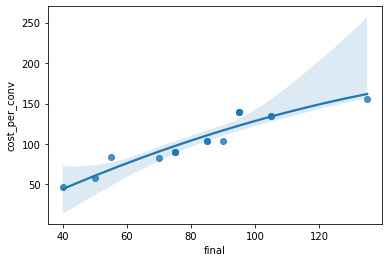

In [14]:
#grpah plot for this 

# sns.regplot(x= "cost_per_conv", y= "impression_share", data= analysis, order = 2)
sns.regplot(x='final',y='cost_per_conv', data = new , order = 2)



In [15]:
#linear relation 

<AxesSubplot:xlabel='final', ylabel='conversions'>

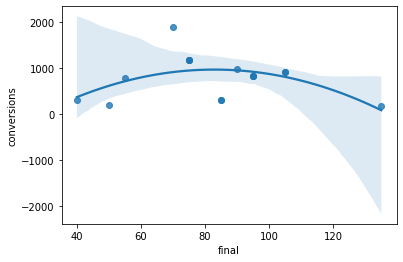

In [16]:
sns.regplot(x='final',y='conversions',  data = new , order = 2)


In [17]:
#80 is optimum range 

<AxesSubplot:xlabel='final', ylabel='cost'>

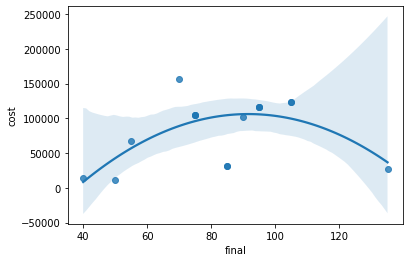

In [18]:
sns.regplot(x='final',y='cost', data = new , order = 2)


In [19]:
#

<AxesSubplot:xlabel='final', ylabel='impression_share'>

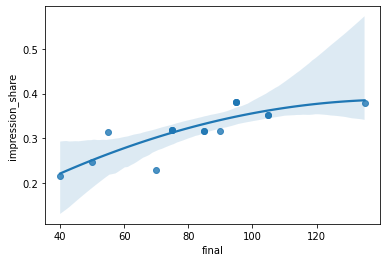

In [20]:

sns.regplot(x='final',y='impression_share',  data = new , order = 2)

In [21]:
# increasing tcpa impression share increase linearly 

# cost_per_conv vs

AxesSubplot(0.125,0.125;0.775x0.755)


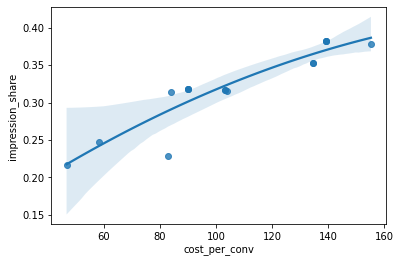

In [22]:

print(sns.regplot(x='cost_per_conv',y='impression_share',  data = new , order = 2))


In [23]:
# increasing cpa impression share increase linearly 

AxesSubplot(0.125,0.125;0.775x0.755)


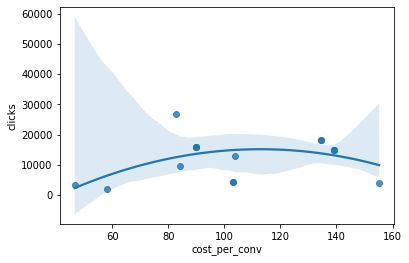

In [24]:
print(sns.regplot(x='cost_per_conv',y='clicks',  data = new , order = 2))

In [25]:
## cicka increase and decreasing butf for meal its just opposite 

<AxesSubplot:xlabel='cost_per_conv', ylabel='conversions'>

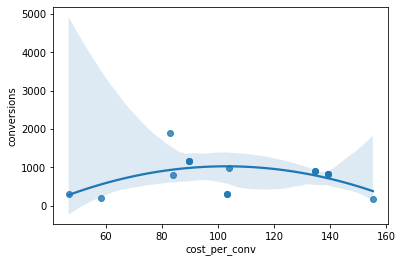

In [26]:
sns.regplot(x='cost_per_conv',y='conversions',  data = new , order = 2)

In [27]:
### its increasing till 80 or 90 but for meal decreasing most of the time

<AxesSubplot:xlabel='cost_per_conv', ylabel='clicks'>

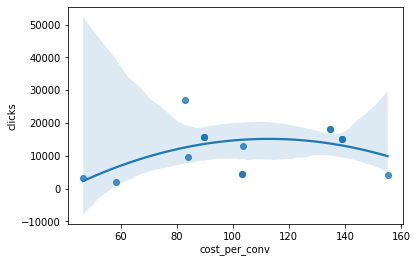

In [28]:
sns.regplot(x='cost_per_conv',y='clicks',  data = new , order = 2)

In [29]:
### its increasing till 80 or 90 but for meal decreasing most of the time

<AxesSubplot:xlabel='impression_share', ylabel='clicks'>

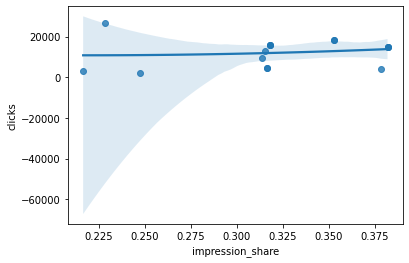

In [30]:
sns.regplot(x='impression_share',y='clicks',  data = new , order = 2)

In [31]:
##  immprssin share increase but cicks seems constant , and for meal cliks decrease to .9 impreesion share and 
##increase after .9 immpression share 

<AxesSubplot:xlabel='clicks', ylabel='conversions'>

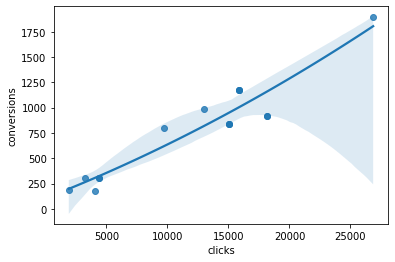

In [32]:
sns.regplot(x='clicks',y='conversions',  data = new , order = 2)

In [33]:
# saem for meal and subscription 

# delta average graphs

<AxesSubplot:xlabel='cost_per_conv_delta', ylabel='impression_share_delta'>

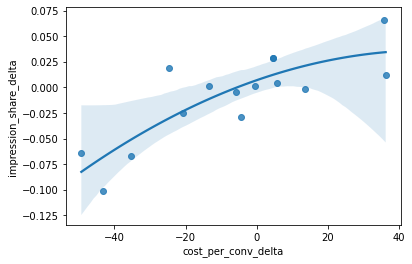

In [34]:
sns.regplot(x='cost_per_conv_delta',y='impression_share_delta',  data = new , order = 2)

In [35]:
## sam for both , delta icrease and delta selta impression share increases 

<AxesSubplot:xlabel='cost_per_conv_delta', ylabel='clicks_delta'>

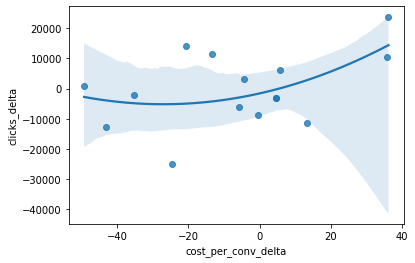

In [36]:
sns.regplot(x='cost_per_conv_delta',y='clicks_delta',  data = new , order = 2)

In [37]:
##first decrease and incease but for meal always decrease

<AxesSubplot:xlabel='cost_per_conv_delta', ylabel='conversions_delta'>

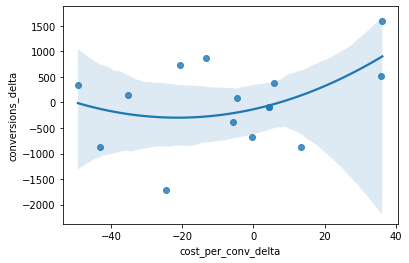

In [38]:
sns.regplot(x='cost_per_conv_delta',y='conversions_delta',  data = new , order = 2)

In [39]:
##c decrease and increase but for meal alwasy decrease 

# for sensitivity check

data1

In [40]:
# data1

In [41]:
# data1["final"]

analysis = data1.groupby(['date','ad_group_id'])[['cost','conversions','final','clicks','impressions','impression_share',"Absolute top impression percentage"]].agg({'cost':'sum','conversions':'sum','final':'mean','clicks':'sum','impressions':'sum','impression_share':'mean', "Absolute top impression percentage":"mean"}).reset_index()
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
analysis['cost_per_click'] = analysis['cost']/analysis['clicks']

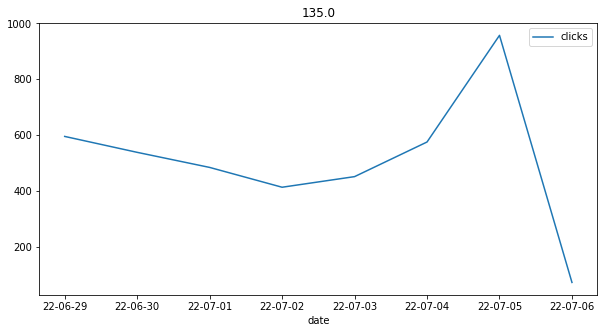

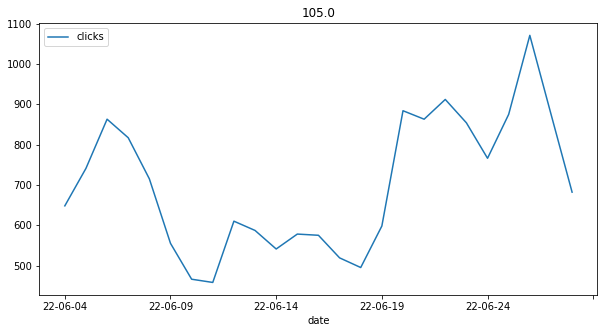

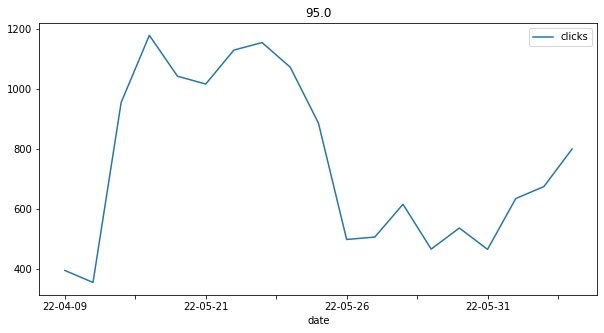

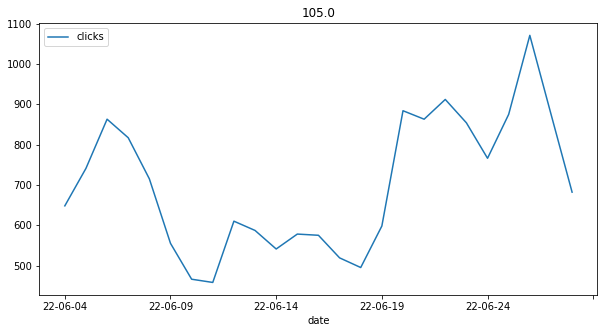

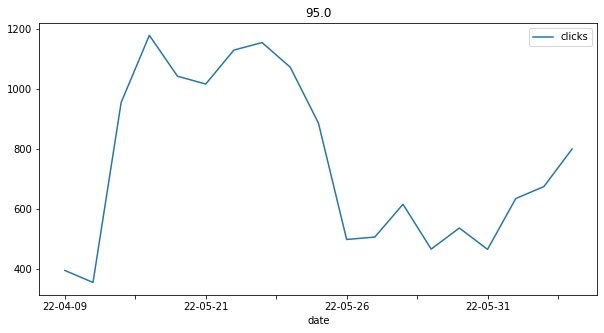

In [42]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "clicks", kind = "line",figsize=(10,5),title = i)


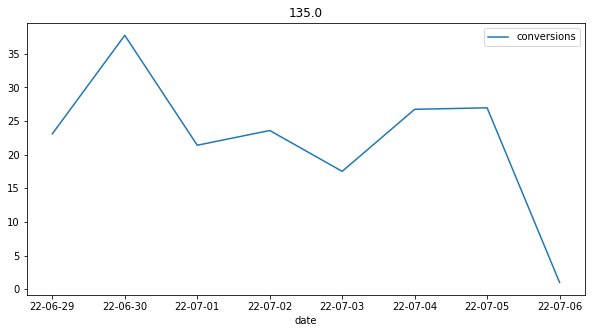

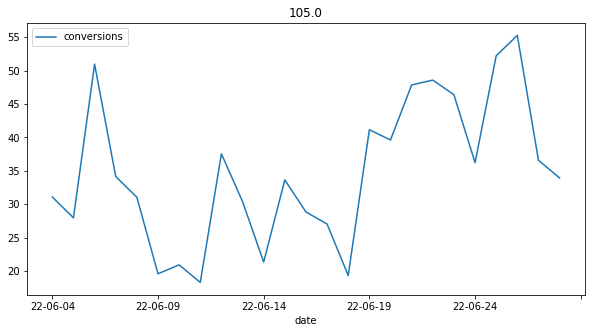

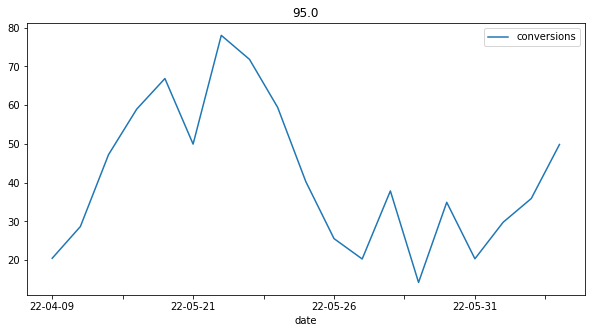

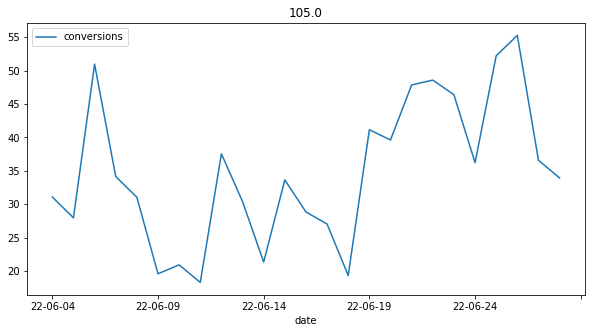

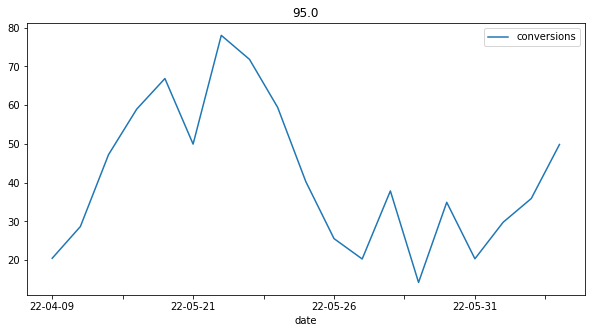

In [43]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "conversions", kind = "line",figsize=(10,5),title = i)

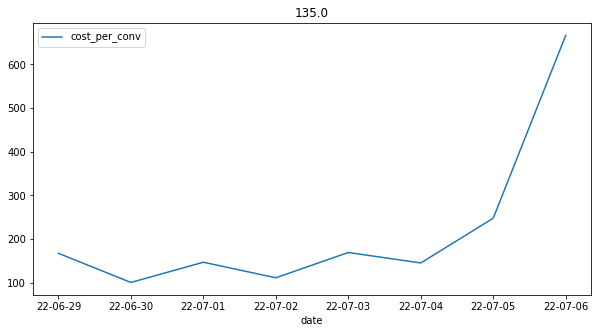

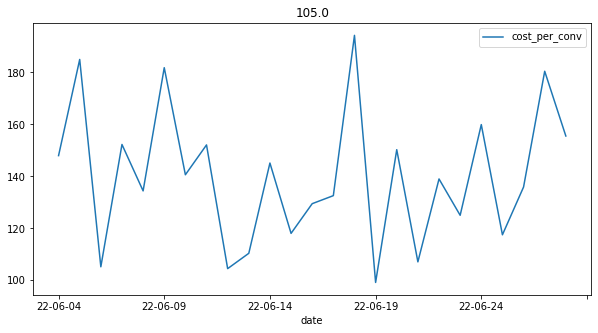

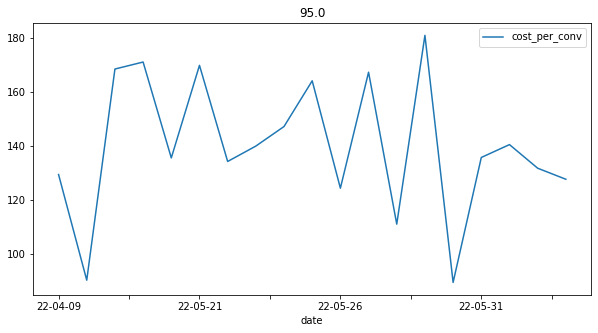

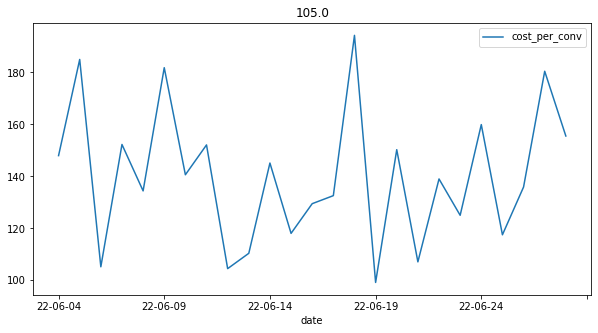

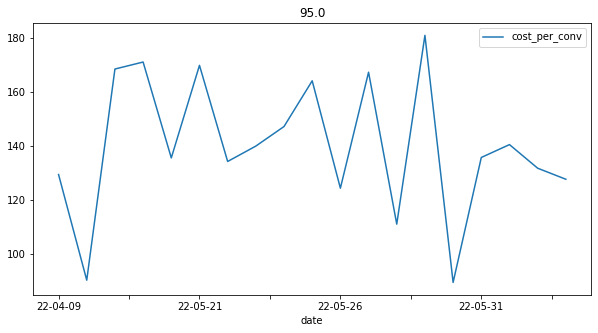

In [44]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "cost_per_conv", kind = "line",figsize=(10,5),title = i)

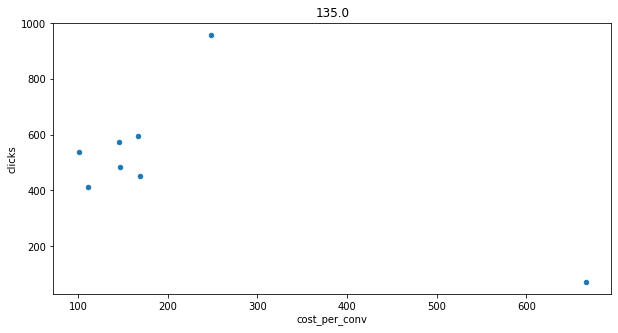

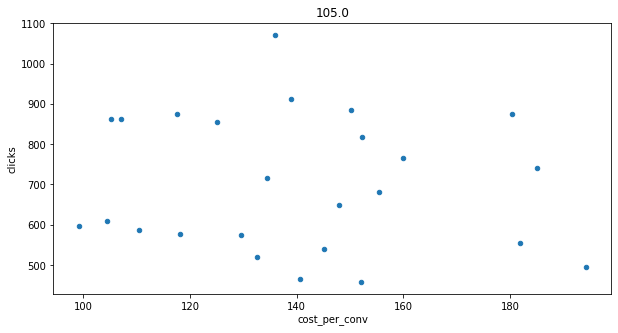

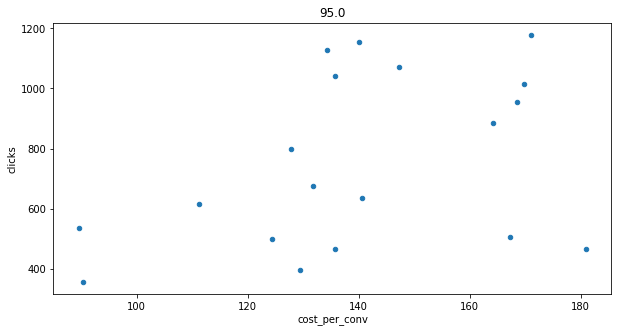

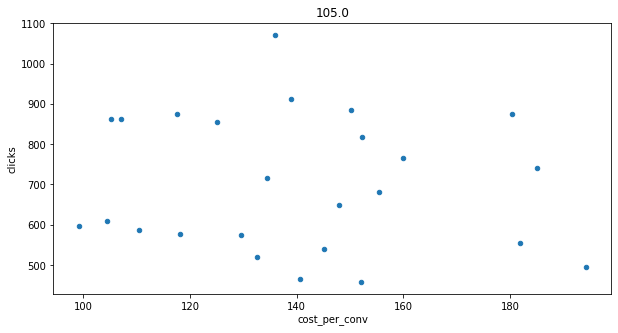

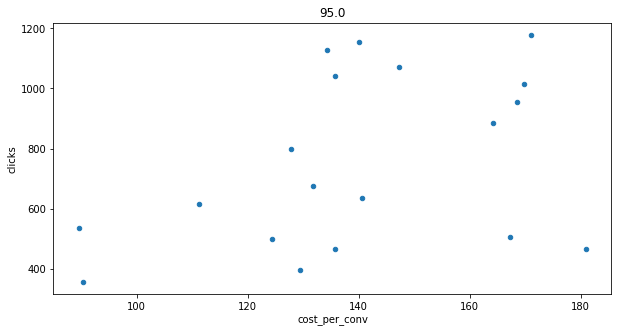

In [45]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
       analysis[analysis["final"]==i].plot(x= "cost_per_conv", y= "clicks", kind = "scatter",figsize=(10,5),title = i)

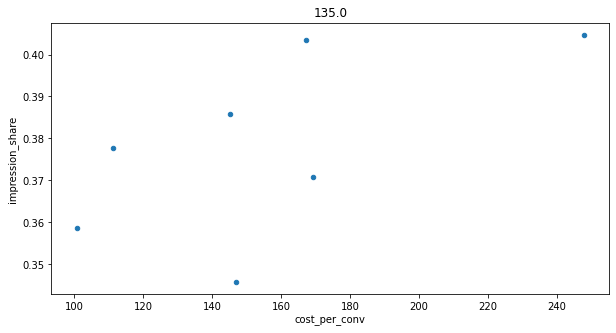

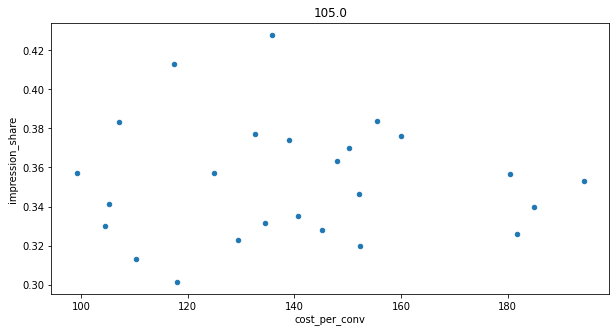

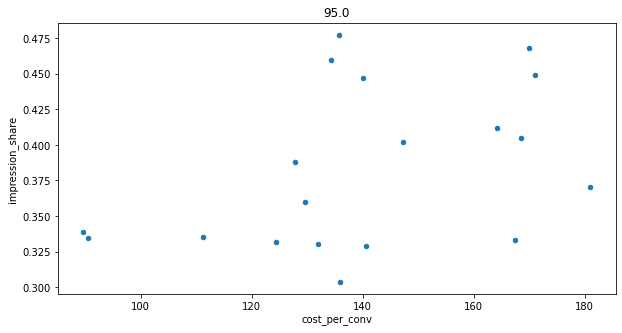

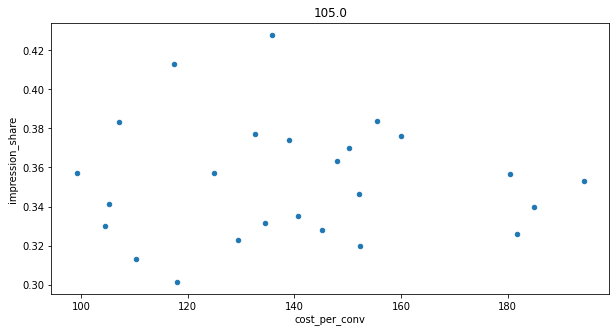

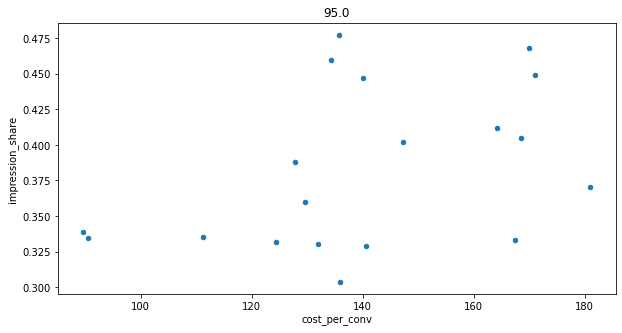

In [46]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "cost_per_conv", y= "impression_share", kind = "scatter",figsize=(10,5),title = i)

# date wise graphs 

In [47]:
import seaborn as sns

<AxesSubplot:xlabel='cost_per_conv', ylabel='impression_share'>

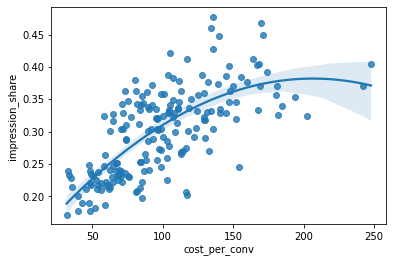

In [48]:
#  analysis.plot(x= "cost_per_conv", y= "impression_share", kind = "scatter",figsize=(10,5))
sns.regplot(x= "cost_per_conv", y= "impression_share", data= analysis, order = 2)

In [49]:
#  its has sturration and increasing wiht cpa value
## for meal
#impression share some range and its has some saturaton value, (at cpa 50 impression share (.8 to .9)) and 
##(100-150 cpa impression share >.9

In [50]:
# data1

<AxesSubplot:>

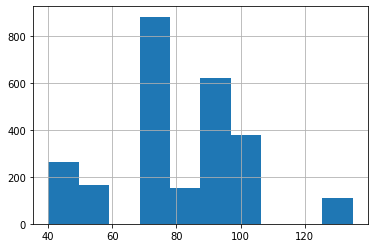

In [51]:
# tcpa["final"].hist()
data1["final"].hist()

<AxesSubplot:xlabel='cost_per_conv', ylabel='clicks'>

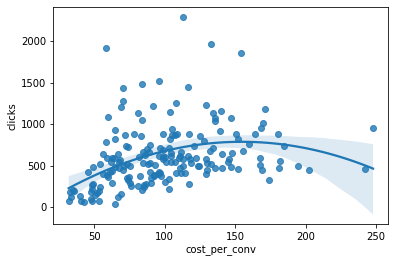

In [52]:

sns.regplot(x= "cost_per_conv", y= "clicks", data= analysis[(analysis["cost_per_conv"]<300) &( analysis["clicks"]<3000)], order = 2)

In [53]:
## saturation and increasing with cpa vlaue 
##for meal it has some specific range


In [54]:
# analysis

<AxesSubplot:xlabel='cost_per_conv', ylabel='Absolute top impression percentage'>

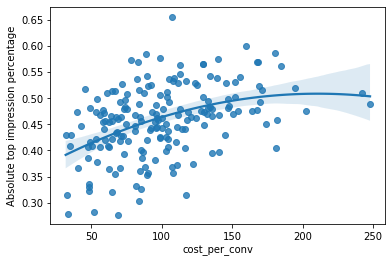

In [55]:
sns.regplot(x= "cost_per_conv", y= "Absolute top impression percentage", data= analysis[analysis["cost_per_conv"]<300], order = 2)


<AxesSubplot:>

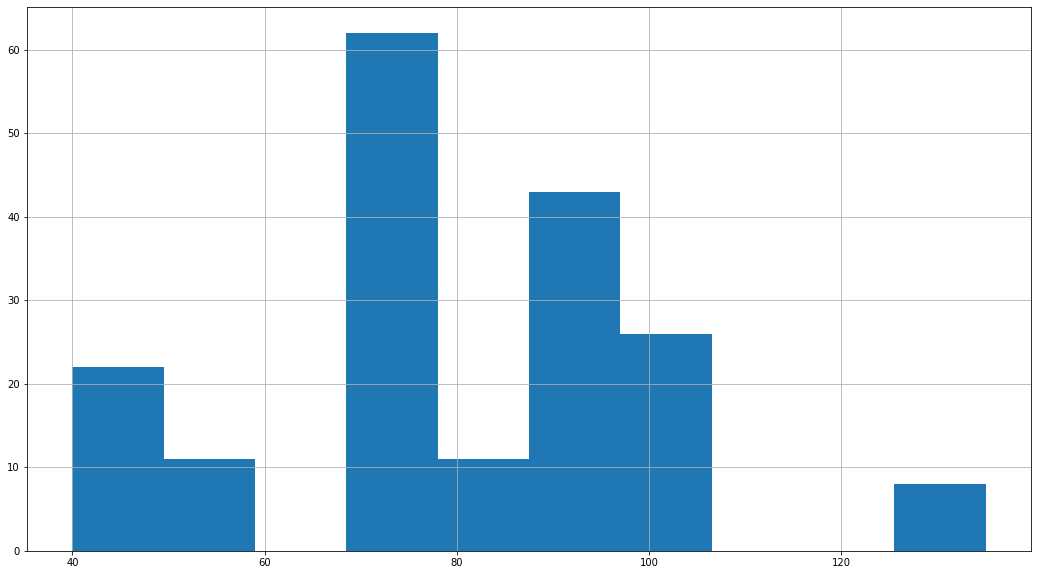

In [72]:
##similar as above for both 
analysis["final"].hist()

<AxesSubplot:xlabel='cost_per_conv', ylabel='conversions'>

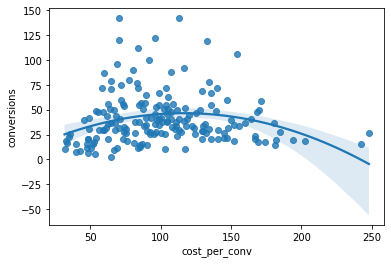

In [57]:

sns.regplot(x= "cost_per_conv", y= "conversions", data= analysis[(analysis["cost_per_conv"]<300) & (analysis["conversions"]<150)], order = 2)

In [58]:
### increase and decrease and also have some saturation value 
##for meal it has some range to work on and it has some saturation value

In [59]:
# data1.info()

<AxesSubplot:xlabel='cost_per_click', ylabel='impression_share'>

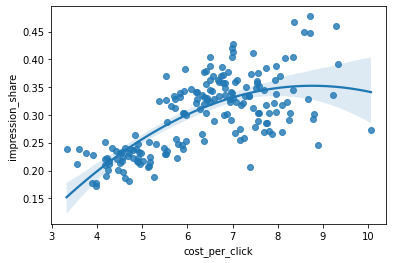

In [60]:

sns.regplot(y= "impression_share", x = "cost_per_click", data= analysis[(analysis["cost_per_conv"]<300)] , order = 2)

In [61]:
## its has some specific range and some saturation value
## meal has some clearly specific range to work 

<AxesSubplot:xlabel='cost_per_click', ylabel='Absolute top impression percentage'>

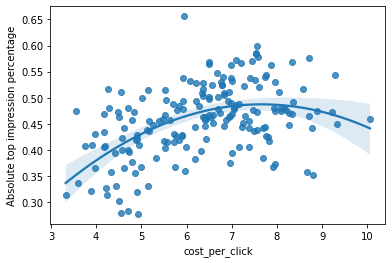

In [62]:

sns.regplot(y= "Absolute top impression percentage", x = "cost_per_click", data= analysis[(analysis["cost_per_conv"]<300)] , order = 2)

In [63]:
## it also have some saturation vaue 
## meals clearly visible specific range 

<AxesSubplot:xlabel='cost_per_conv', ylabel='cost'>

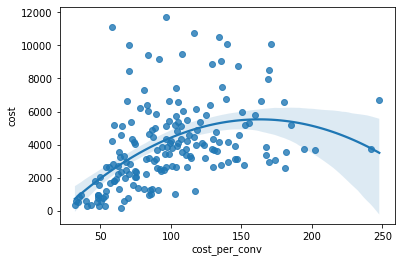

In [64]:
sns.regplot(x= "cost_per_conv", y= "cost", data= analysis[(analysis["cost_per_conv"]<300) & (analysis["cost"]<12500)], order = 2)

<AxesSubplot:xlabel='final', ylabel='cost_per_conv'>

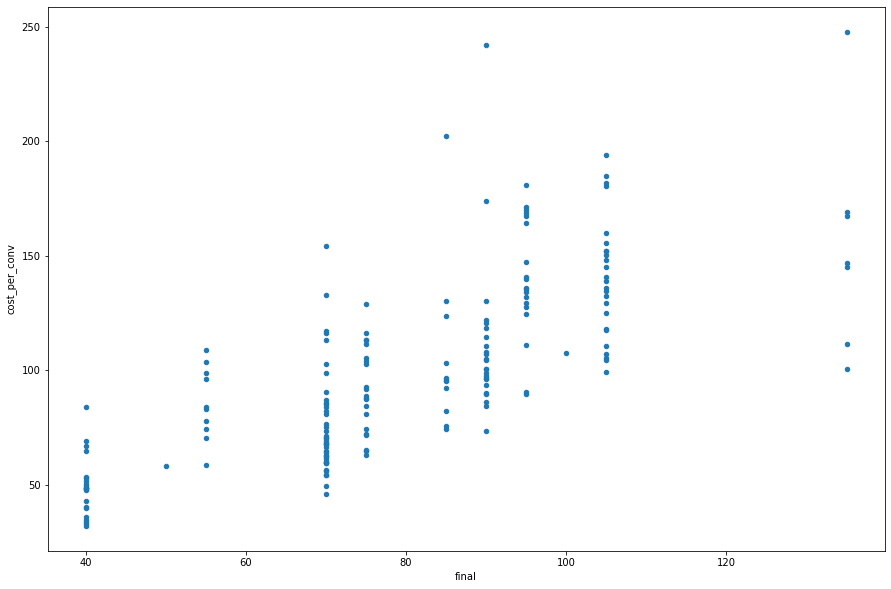

In [65]:
 analysis[analysis["cost_per_conv"]<250].plot(y= "cost_per_conv", x= "final", kind = "scatter",figsize=(15,10))

<AxesSubplot:xlabel='final', ylabel='cost_per_conv'>

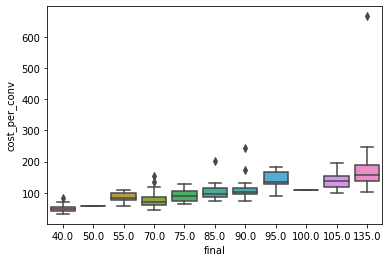

In [66]:
# import matplotlib.pyplot as plt
# _,ax=plt.subplot(figsize = (18,3))
sns.boxplot(y= "cost_per_conv", x= "final", data =  analysis, width=.8 )

<AxesSubplot:>

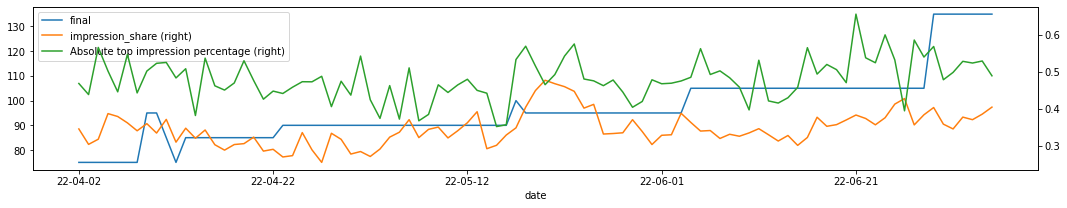

In [67]:
ax= analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "final", figsize = (18,3))
analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "impression_share",ax=ax, secondary_y =True) 


analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "Absolute top impression percentage",ax=ax, secondary_y =True)


[]

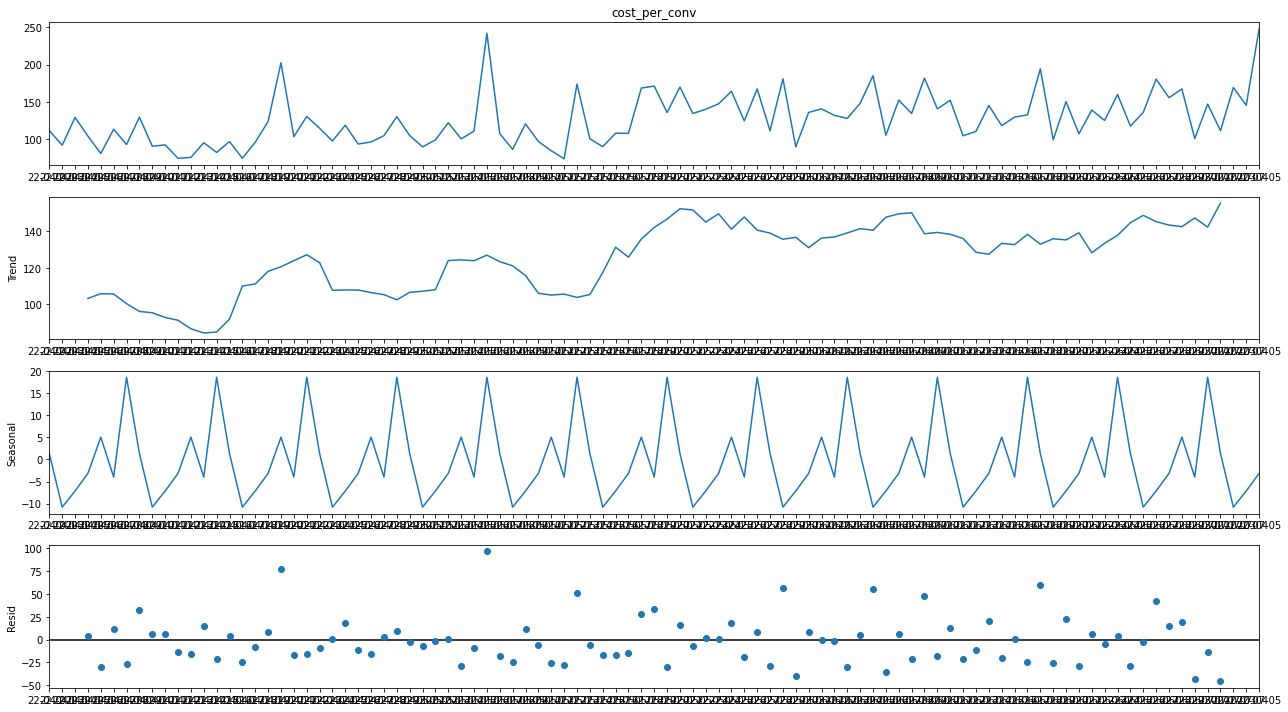

In [70]:
# analysis
analysis1 = analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")]['cost_per_conv']
analysis1.index = (analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].date)
decompose_result_mult = seasonal_decompose(analysis1, model="additive",period =7)
plt.rcParams.update({'figure.figsize': (18,10)})
decompose_result_mult.plot()
plt.plot()

In [74]:
data1["keyword"].unique()

array(['www hellofresh com', 'hellofresh com', 'hello fresh com',
       'hello fresh box', 'www hello fresh', 'www hellofresh',
       'hello fresh boxes', 'hellofresh box', 'hellofresh boxes',
       'hellofreshcom', 'hello fresh service', 'hello fresh options',
       'hello fresh plan', 'hellofresh options',
       'hello fresh subscriptions'], dtype=object)

In [75]:
analysis["conversions"].sum()

8770.0

In [76]:
analysis["cost"].sum()

853256.5

In [77]:
analysis["cost"].sum()/analysis["conversions"].sum()

97.29264538198403